**FGV EPGE - Escola de Pós-graduação em Economia**
==
**Trabalho da Disciplina Deep Learning**
==

Professores: 


Monitora: 

Alunas: 

**Amazon Fine Food Reviews**

Analyze ~500,000 food reviews from Amazon.

## Based on **CRISP-DM**

The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

- 1. Business understanding – What does the business need?
- 2. Data understanding – What data do we have / need? Is it clean?
- 3. Data preparation – How do we organize the data for modeling?
- 4. Modeling – What modeling techniques should we apply?
- 5. Evaluation – Which model best meets the business objectives?
- 6. Deployment – How do stakeholders access the results?

In [69]:
## libraries
import time
start_time = time.time()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import os.path
import sys
import gc

# release memory RAM
def release_memory(df):   
    del df
    gc.collect() 
    df = pd.DataFrame() # point to NULL
    print('memory RAM released.')

# release memory for large arrays (dictionary)
def release_array(dd):
    del dd 
    gc.collect()
    dd = None

In [70]:
# Reduce DataFrame size
# This part of the code is not my, I get from this webpage: 
# https://www.mikulskibartosz.name/how-to-reduce-memory-usage-in-pandas/
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [71]:
from time import gmtime, strftime
import requests as re
import re # for regex
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
from transformers import BertTokenizer, BertForSequenceClassification
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score
import joblib

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator



[nltk_data] Downloading package wordnet to /home/andsilva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

In [73]:
now = datetime.now()
 
print("date..............:", now)

date..............: 2023-05-26 20:48:59.176515


### 1. Business understanding – What does the business need?

Compreender o contexto de negócios para a análise de sentimentos em avaliações de alimentos da Amazon é fundamental para identificar como essa análise pode ser aplicada de maneira relevante. Para a compreensão do negócio para a análise de sentimentos nessas avaliações:

1. **Descrição do problema**:
   A Amazon é uma das maiores varejistas online do mundo e possui uma vasta variedade de produtos disponíveis, incluindo alimentos. Os clientes têm a oportunidade de deixar avaliações e comentários sobre esses produtos, o que pode influenciar as decisões de compra de outros consumidores.

   A análise de sentimentos em avaliações de alimentos da Amazon visa extrair informações valiosas dessas avaliações, identificando a polaridade (positiva, negativa ou neutra) dos sentimentos expressos pelos clientes. Isso permite que a Amazon entenda melhor a satisfação do cliente em relação a um determinado produto e tome medidas adequadas para melhorar a experiência do cliente e a qualidade dos produtos oferecidos.

2. **Objetivos do negócio**:
   - Compreender a satisfação do cliente: A análise de sentimentos ajuda a determinar se os clientes estão satisfeitos ou insatisfeitos com os alimentos adquiridos na Amazon. Isso permite à empresa ter uma visão geral da percepção dos clientes em relação aos produtos oferecidos e identificar possíveis problemas ou áreas de melhoria.

   - Tomar decisões de negócios informadas: Ao analisar os sentimentos expressos nas avaliações, a Amazon pode identificar padrões e tendências que ajudam a tomar decisões informadas sobre quais produtos devem ser promovidos, quais necessitam de melhorias ou quais devem ser descontinuados.

   - Personalização da experiência do cliente: Com base na análise de sentimentos, a Amazon pode fornecer recomendações personalizadas aos clientes, levando em consideração suas preferências e opiniões expressas em avaliações anteriores. Isso melhora a experiência de compra do cliente e aumenta a fidelidade à marca.

3. **Fonte de dados**:
   A fonte de dados para a análise de sentimentos são as avaliações dos clientes sobre alimentos da Amazon. Esses dados podem incluir informações como texto da avaliação, classificação (por exemplo, de 1 a 5 estrelas), data da avaliação e informações do cliente (por exemplo, nome, localização, histórico de compras).

   Essas avaliações podem ser coletadas por meio da API pública da Amazon ou por meio de um conjunto de dados já disponível contendo avaliações históricas.

4. **Métricas de avaliação**:
   As métricas comuns para avaliar a eficácia da análise de sentimentos em avaliações de alimentos podem incluir:
   - Acurácia: percentual de avaliações classificadas corretamente em termos de sentimento (positivo, negativo ou neutro).
   - Precisão e revocação: medidas que indicam a proporção de avaliações positivas/negativas corretamente identificadas em relação ao total de avaliações positivas/negativas presentes nos dados.

   Outras métricas podem ser usadas, dependendo dos objetivos específicos do negócio.

In [74]:
## https://www.datascience-pm.com/crisp-dm-2/

#### https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
df_reviews = pd.read_csv('../dataset/Reviews.csv') # full dataset

# reduce memory usage
df_reviews = reduce_mem_usage(df_reviews)

# dataset size:
print(f'Numero de linhas: {df_reviews.shape[0]}, numero de colunas: {df_reviews.shape[1]}') 

Memory usage of dataframe is 43.37 MB
Memory usage after optimization is: 43.37 MB
Decreased by 0.0%
Numero de linhas: 568454, numero de colunas: 10


### 2. Data understanding – What data do we have / need? Is it clean?

- Explorar os dados:
  - Carregue o conjunto de dados em Python e examine sua estrutura e conteúdo.
  - Verifique as diferentes colunas presentes nos dados, como o texto do comentário, a classificação (positiva ou negativa) ou outras informações relevantes.

In [75]:
######## parte do dataset
df_reviews_copy = df_reviews.copy()
df_reviews_sample = df_reviews_copy.sample(6000) # FIXME remover no final

# release memory RAM - dataframe
release_memory(df_reviews_copy)
release_memory(df_reviews)
df_reviews = df_reviews_sample[['Score', 'Text']] # select o
release_memory(df_reviews_sample)

memory RAM released.
memory RAM released.
memory RAM released.


### Data preparation – How do we organize the data for modeling?

In [76]:
# Lista de valores faltantes
df_reviews.isna().sum()

Score    0
Text     0
dtype: int64

In [77]:
# dataset - tamanho
df_reviews.shape

(6000, 2)

In [78]:
# retirar linha com valores faltantes
df_reviews = df_reviews.dropna()

In [79]:
# checar numero de linha faltantes
df_reviews.isna().sum()

Score    0
Text     0
dtype: int64

In [80]:
df_reviews.shape

(6000, 2)

In [81]:
# retirar os neutros.
df_reviews = df_reviews[df_reviews['Score'] != 3]

In [82]:
df_reviews.head(3)

,Score,Text
270682,5,Just as described. Great sauce for fish pork a...
462595,5,This brand of tea contains better flavorings t...
104296,1,"I tried this jerky, loved the ""all naturalness..."


In [83]:
# lista a quantidade de cada categoria de score.
df_reviews['Score'].value_counts()

5    3832
4     869
1     515
2     320
Name: Score, dtype: int64

In [84]:
# redefinir score
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "0"
    #elif label == 3.0:
    #    return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "1"
df_reviews['negative'] = df_reviews["Score"].apply(sentiment)

In [85]:
df_reviews["negative"].value_counts()

0    4701
1     835
Name: negative, dtype: int64

In [86]:
#Mude df5 para df3 para pegar toda base
texts = df_reviews['Text'].sum()
texts[0:1000]

'Just as described. Great sauce for fish pork and beef. Has just enought kick.  2liter is a  lot of sauce.This brand of tea contains better flavorings than the other<br />brands of Earl Grey tea. The others seem to leave a dusty,<br />dirty after taste where the Bigelow brand does not. I always<br />order the 6 boxes of forty count to have them on hand.I tried this jerky, loved the "all naturalness" of it. The taste is ok, but it\'s extremely dry and very tough and hard to eat. I will not buy this again.My wife got me started on jelly beans a year or so ago.  Love `em.  The jelly belly\'s are good but Gimbal\'s were good too.  And since they are usually cheaper, I usually buy them.  No more.<br /><br />These cherry-flavored beans from Gimbal\'s are, sadly, incredibly bad.  They are about 4 times larger than a normal jelly bean... in the shape of heart, and some very odd non-robust flavors.<br /><br />A huge waste of money; a huge disappointment.As always, fast delivery from Amazon.  Th

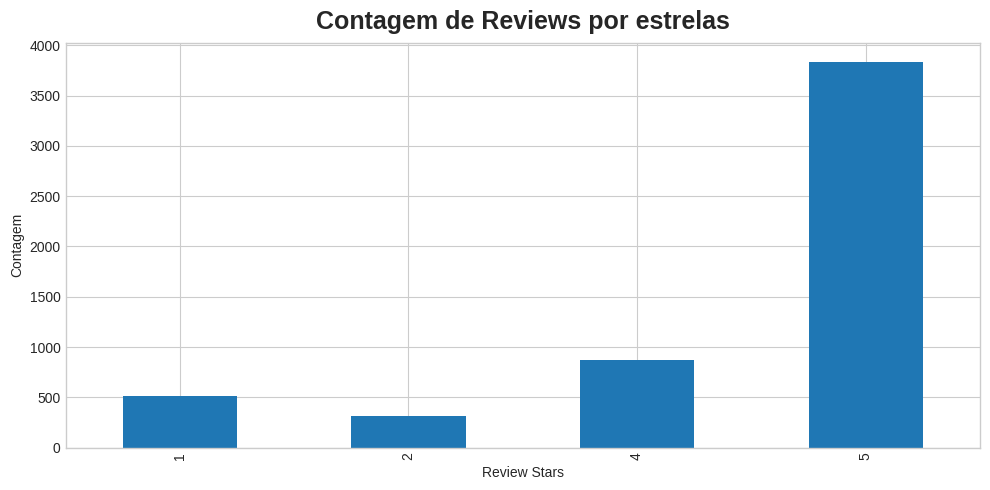

In [87]:
ax = df_reviews['Score'].value_counts().sort_index().plot(kind='bar',
                                                  title='Contagem de Reviews por estrelas',
                                                  figsize=(10, 5)
                                                 )

ax.set_xlabel('Review Stars')
ax.set_ylabel('Contagem')
plt.show()

In [88]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords_pa = stop_en + stop_pt
stopwords_pa.extend(['-',''])

In [89]:
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]


In [90]:
# lista de palavras do Text 'reviews'
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords_pa]
freqdist = Counter(list_words)
dict(freqdist.most_common(10))

{'br': 2551,
 'like': 2350,
 'good': 1786,
 'great': 1605,
 'one': 1553,
 'taste': 1498,
 'food': 1372,
 'coffee': 1322,
 'product': 1260,
 'love': 1233}

In [91]:
from wordcloud import WordCloud
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

### Nuvem de Palavras

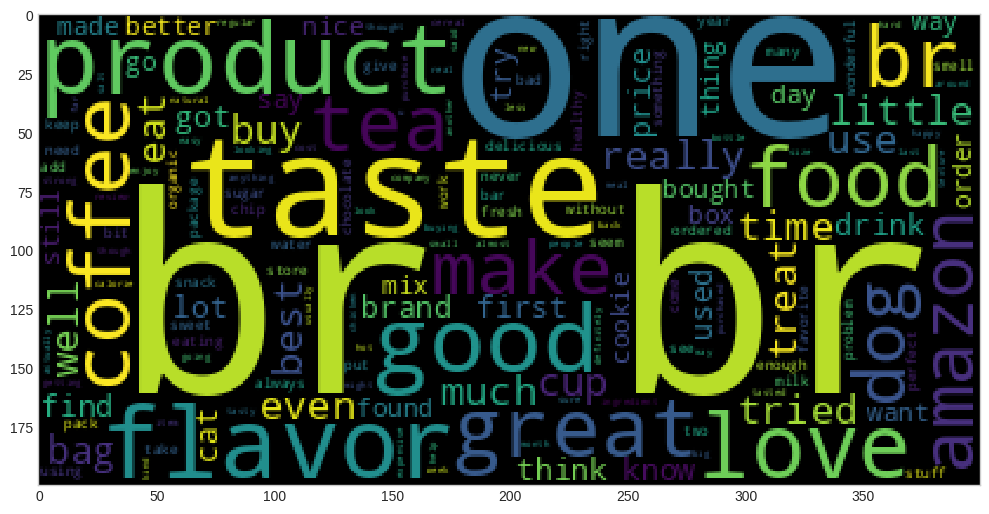

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.grid(False)
plt.tight_layout()

In [93]:
freq_common_works = dict(freqdist.most_common(10))
freq_common_works

{'br': 2551,
 'like': 2350,
 'good': 1786,
 'great': 1605,
 'one': 1553,
 'taste': 1498,
 'food': 1372,
 'coffee': 1322,
 'product': 1260,
 'love': 1233}

In [94]:
common_words = list(freq_common_works.keys())
common_words = common_words[0:4]

In [95]:
dispersion_words = common_words
plt.figure(figsize=(16,6))
#nltk_text.dispersion_plot(dispersion_words)

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

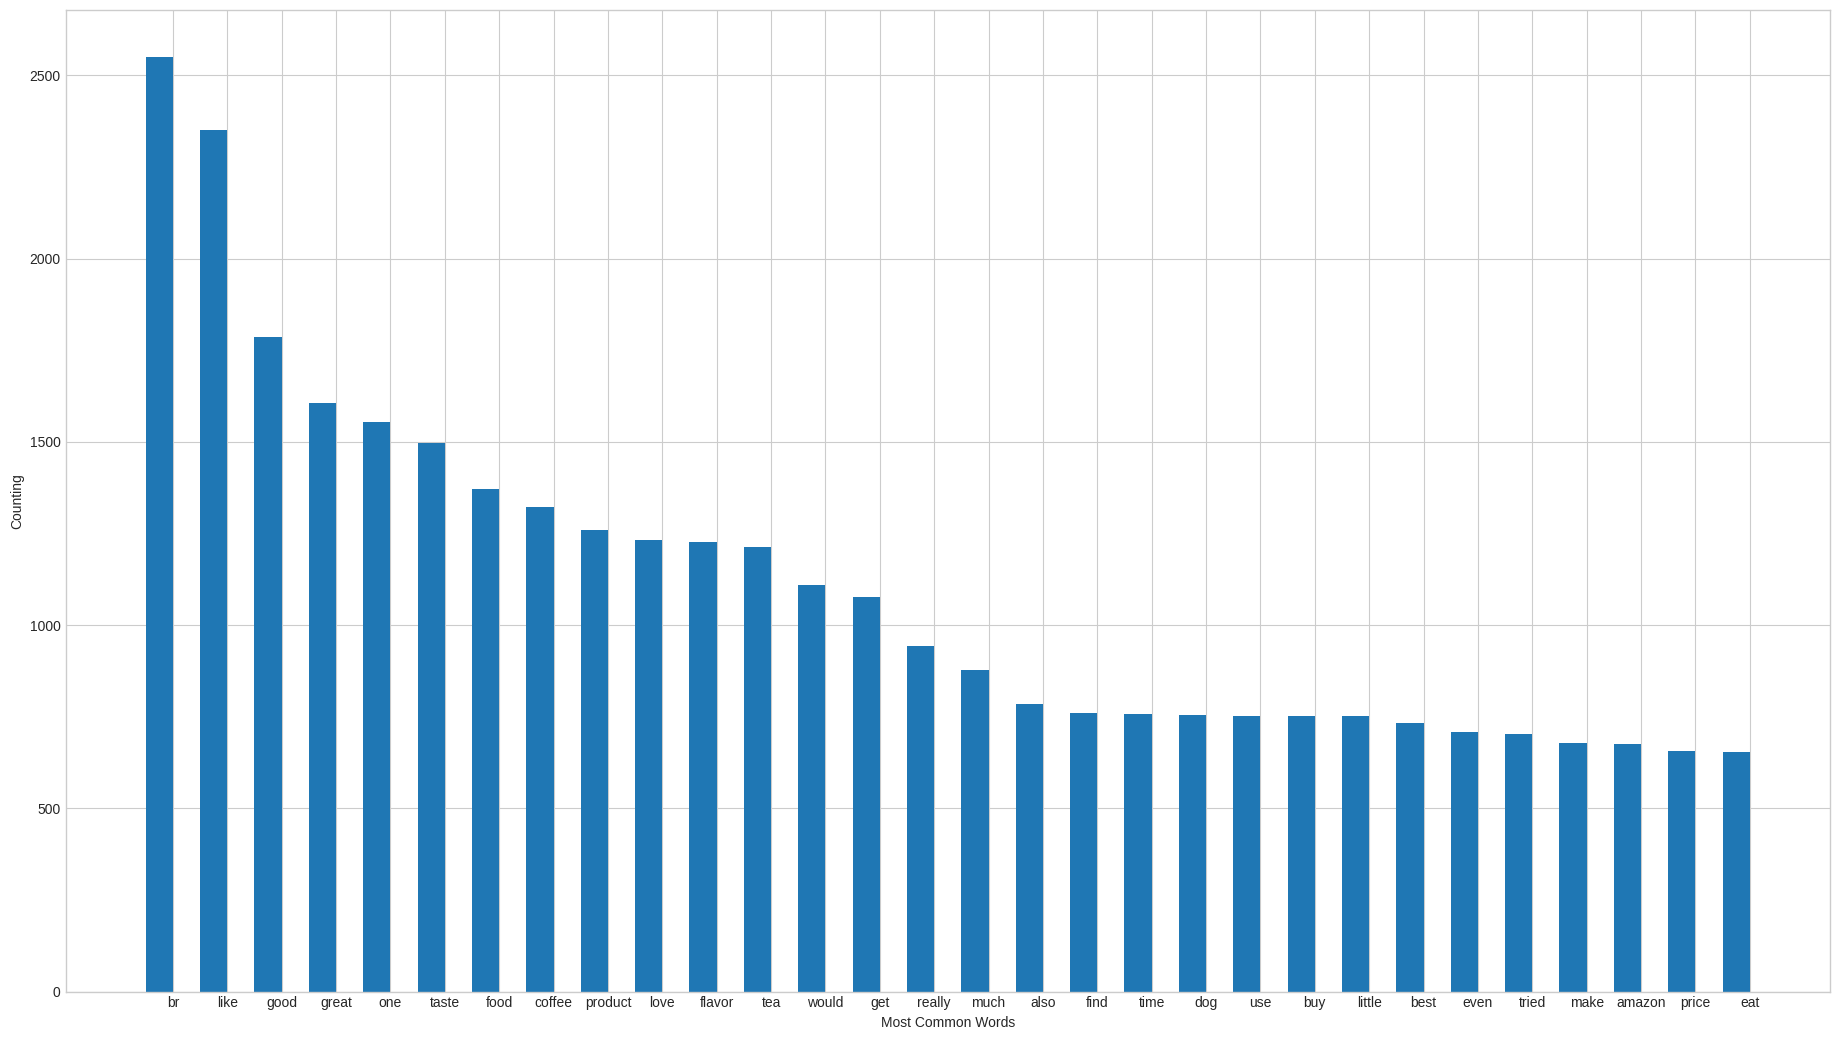

In [96]:
labels, values = zip(*freqdist.most_common(30))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('Most Common Words') 
plt.ylabel('Counting') 
plt.show()

In [97]:
# remove tags html
# cleaning
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df_reviews['Text'] = df_reviews['Text'].apply(clean)

In [98]:
# remover caracteres especiais
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df_reviews['Text'] = df_reviews['Text'].apply(is_special)

In [99]:
# Converter - lowercase
def to_lower(text):
    return text.lower()

df_reviews['Text'] = df_reviews['Text'].apply(to_lower)

In [100]:
nltk.download('stopwords')
nltk.download('punkt')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df_reviews['Text'] = df_reviews['Text'].apply(rem_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [101]:
#No review tenha palavras de outro idioma
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

df_reviews['Text'] = df_reviews['Text'].apply(stem_txt)
#df_reviews['Text']

In [102]:
df_reviews.columns

Index(['Score', 'Text', 'negative'], dtype='object')

In [103]:
# converter string para inteiro
df_reviews['negative'] = pd.to_numeric(df_reviews['negative'])

In [104]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5536 entries, 270682 to 482106
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Score     5536 non-null   int64 
 1   Text      5536 non-null   object
 2   negative  5536 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 173.0+ KB


In [105]:
df_reviews['Text']

270682    describ great sauc fish pork beef enought kick...
462595    brand tea contain better flavor otherbrand ear...
104296    tri jerki love natur tast ok extrem dri tough ...
172304    wife got start jelli bean year ago love em jel...
498144    alway fast deliveri amazon good tast decaf cof...
                                ...                        
214994    say chia delici life chang good qualiti seed p...
344614    tri everi varieti popchip one far favorit pepp...
198880    product promis found lessen cramp get also act...
186909    bee subscrib coffe month multipl shipment qual...
482106                 sooo good yummi fill natur could ask
Name: Text, Length: 5536, dtype: object

In [106]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [107]:
df_reviews['Text'] = df_reviews['Text'].apply(preprocess_text)
df_reviews['Text']

270682    describ great sauc fish pork beef enought kick...
462595    brand tea contain better flavor otherbrand ear...
104296    tri jerki love natur tast ok extrem dri tough ...
172304    wife got start jelli bean year ago love em jel...
498144    alway fast deliveri amazon good tast decaf cof...
                                ...                        
214994    say chia delici life chang good qualiti seed p...
344614    tri everi varieti popchip one far favorit pepp...
198880    product promis found lessen cramp get also act...
186909    bee subscrib coffe month multipl shipment qual...
482106                 sooo good yummi fill natur could ask
Name: Text, Length: 5536, dtype: object

In [108]:
X = df_reviews['Text']
y = df_reviews['negative']

In [109]:
# release memory RAM
release_memory(df_reviews)

memory RAM released.


In [110]:
## Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer()

# feature
X = cv.fit_transform(X).toarray() # array type

smote = SMOTE()

# inbalance data to balance
X, y = smote.fit_resample(X, y)

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (9402, 10767)
y.shape =  (9402,)


In [111]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=0)

In [112]:
# release memory - array
release_array(X)
release_array(y)

In [113]:
#Criando funções para avaliação dos modelos
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [114]:
def clf_eval(clf, X, y_true, classes=['Positivo', 'Negativo']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
    return roc_auc_score(y_true, y_pred)

## Modeling – What modeling techniques should we apply?

### Machine Learning

#### Gaussian Naive Bayes (GaussianNB).

In [115]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB().fit(x_train, y_train)


### Evaluation – Which model best meets the business objectives?

Classification Report
              precision    recall  f1-score   support

    Positivo       1.00      0.77      0.87      3766
    Negativo       0.81      1.00      0.90      3755

    accuracy                           0.89      7521
   macro avg       0.91      0.89      0.88      7521
weighted avg       0.91      0.89      0.88      7521

ROC Score: 0.8863515666489644
Accuracy Score: 0.886185347693126
Average Precision Score: 0.8143569724571676
f1 Score: 0.8976810901267033
Confusion matrix, without normalization
[[2910  856]
 [   0 3755]]


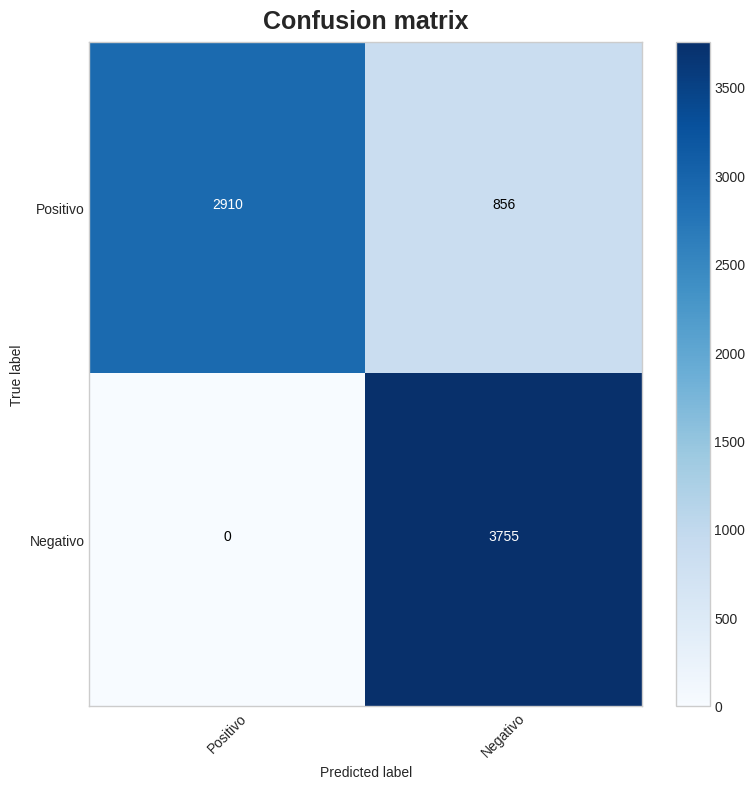

In [116]:
roc_gnb = clf_eval(clf_gnb, x_train, y_train)

#### Naive Bayes classifier for multivariate Bernoulli model

In [117]:
from sklearn.naive_bayes import BernoulliNB

clf_bnb = BernoulliNB(alpha=0.20, 
                     binarize=0.0, 
                     fit_prior=True, 
                     class_prior=None).fit(x_train, y_train)


### Evaluation – Which model best meets the business objectives?

Classification Report
              precision    recall  f1-score   support

    Positivo       0.88      0.75      0.81      3766
    Negativo       0.78      0.90      0.84      3755

    accuracy                           0.83      7521
   macro avg       0.83      0.83      0.82      7521
weighted avg       0.83      0.83      0.82      7521

ROC Score: 0.8256589726708875
Accuracy Score: 0.8255551123520808
Average Precision Score: 0.7551758364925303
f1 Score: 0.8369376087496891
Confusion matrix, without normalization
[[2842  924]
 [ 388 3367]]


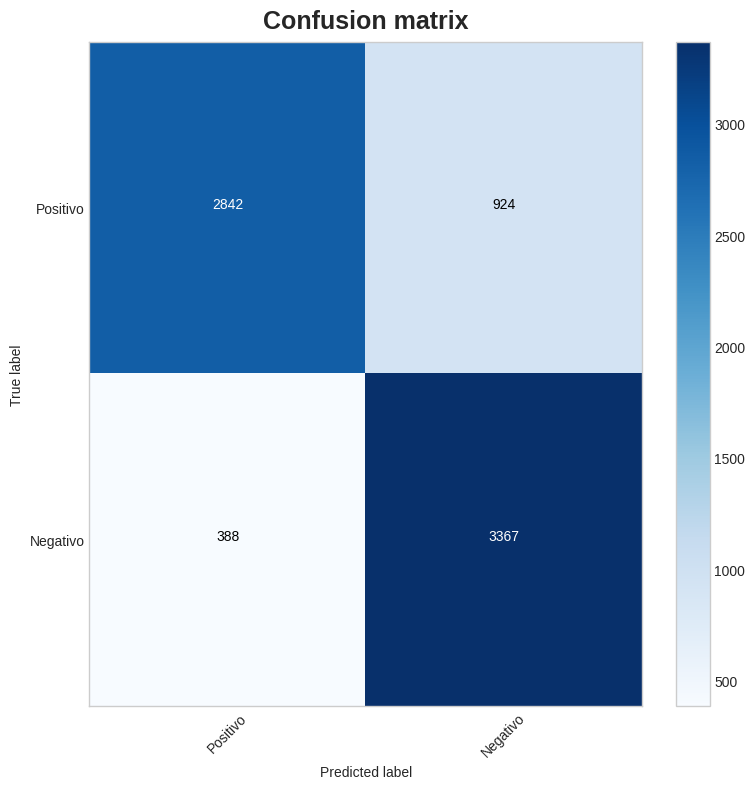

In [118]:
roc_bnb = clf_eval(clf_bnb, x_train, y_train)

#### Gradient Boosting for classification.

In [119]:
gb_clf = GradientBoostingClassifier()
gb_clf_sa =gb_clf.fit(x_train, y_train)
pred_train = gb_clf_sa.predict(x_train)

### Evaluation – Which model best meets the business objectives?

Classification Report
              precision    recall  f1-score   support

    Positivo       0.90      0.84      0.87       935
    Negativo       0.85      0.91      0.88       946

    accuracy                           0.87      1881
   macro avg       0.88      0.87      0.87      1881
weighted avg       0.88      0.87      0.87      1881

ROC Score: 0.8732682502176345
Accuracy Score: 0.873471557682084
Average Precision Score: 0.8185302679594764
f1 Score: 0.878323108384458
Confusion matrix, without normalization
[[784 151]
 [ 87 859]]


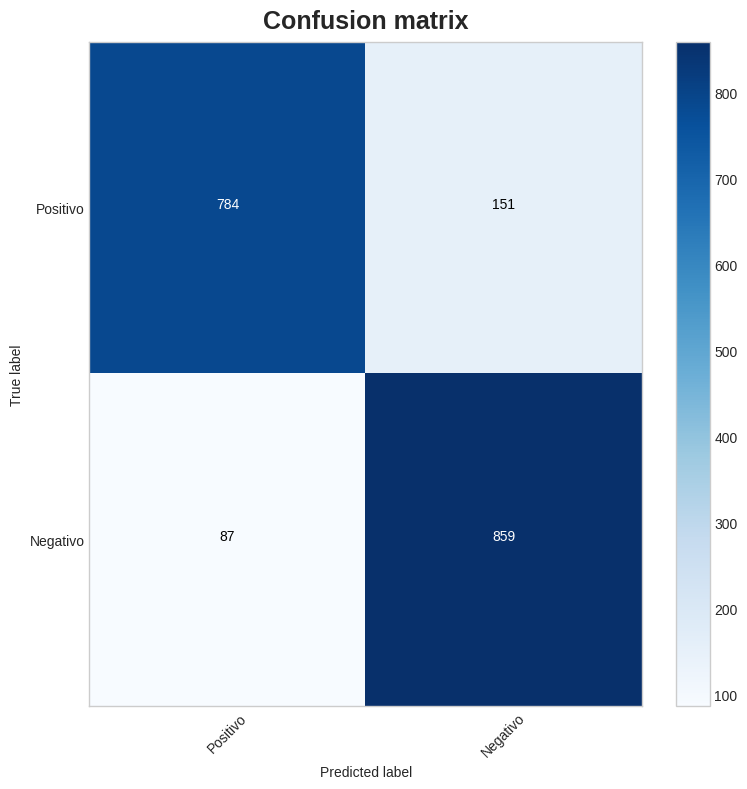

In [120]:
roc_gb = clf_eval(gb_clf_sa, x_validation, y_validation)

#### Deep learning: Keras

In [121]:
plt.style.use("seaborn-v0_8-whitegrid")
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [122]:
model = keras.Sequential([layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='sigmoid'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1),
                         ])

#model.compile(optimizer='adam', loss='mae',)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [123]:
# fitting...
history = model.fit(x_train, y_train,
                    validation_data=(x_validation, y_validation),
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                   )

Epoch 1/10


2023-05-26 20:54:12.537737: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 647828856 exceeds 10% of free system memory.


30/30 [==============================] - ETA: 0s - loss: 3.5981 - accuracy: 0.7458

2023-05-26 20:54:22.429591: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 162021816 exceeds 10% of free system memory.


30/30 [==============================] - 10s 263ms/step - loss: 3.5981 - accuracy: 0.7458 - val_loss: 7.6825 - val_accuracy: 0.4960
Epoch 2/10
30/30 [==============================] - 7s 237ms/step - loss: 2.6536 - accuracy: 0.8189 - val_loss: 7.7259 - val_accuracy: 0.4981
Epoch 3/10
30/30 [==============================] - 7s 223ms/step - loss: 6.1620 - accuracy: 0.5892 - val_loss: 8.4142 - val_accuracy: 0.4476
Epoch 4/10
30/30 [==============================] - 7s 218ms/step - loss: 4.2004 - accuracy: 0.7160 - val_loss: 7.8095 - val_accuracy: 0.4918
Epoch 5/10
30/30 [==============================] - 7s 234ms/step - loss: 2.2943 - accuracy: 0.8451 - val_loss: 7.7574 - val_accuracy: 0.4971
Epoch 6/10
30/30 [==============================] - 7s 221ms/step - loss: 2.0624 - accuracy: 0.8612 - val_loss: 7.2408 - val_accuracy: 0.4987
Epoch 7/10
30/30 [==============================] - 7s 220ms/step - loss: 2.0091 - accuracy: 0.8627 - val_loss: 6.3292 - val_accuracy: 0.5486
Epoch 8/10
30/30

In [124]:
joblib.dump(model, 'modelkeras.pkl')
joblib.dump(model, 'modelkeras.h5')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......batch_normalization_1
.........vars
............0
............1
............2
............3
......batch_normalization_2
.........vars
............0
............1
............2
............3
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.

['modelkeras.h5']

## Files JSON and H5

In [125]:
# serialize model to JSON
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()

with open("modelkeras.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("modelkeras.h5")
print("Saved model to disk")

Saved model to disk


In [126]:
with open('cv.pkl','wb') as f:
    pickle.dump(cv,f)

In [127]:
# Define your model architecture
#model_batching = tf.keras.models.Sequential()

In [128]:
# Define your data preprocessing and augmentation
#train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [129]:
# Set up the training data generator with batch size
#batch_size = 32

In [130]:
# Set up the training data generator with the path to your dataset
#train_generator = train_datagen.flow_from_directory(
#    'data-csv/ReviewsToModeling.csv',
#    target_size=(224, 224),  # Modify according to your input size
#    batch_size=batch_size,
#    class_mode='categorical',
#    subset='training'
#)

### Evaluation – Which model best meets the business objectives?

The loss function compares the prediction generated by the model with the true value. It calculates a numerical value that represents the mismatch or error between the predicted and the true value.

Text(0.5, 1.0, 'The learning curves')

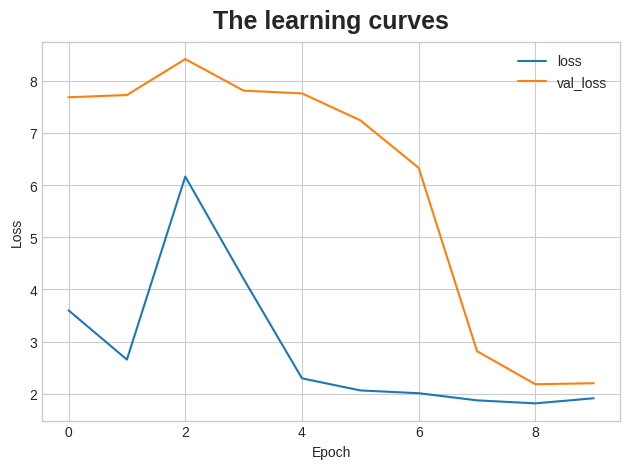

In [131]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('The learning curves')

 1/59 [..............................] - ETA: 8s

2023-05-26 20:55:29.602004: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 162021816 exceeds 10% of free system memory.


59/59 [==============================] - 1s 20ms/step
Classification Report
              precision    recall  f1-score   support

    Positivo       0.78      0.98      0.87       935
    Negativo       0.97      0.72      0.83       946

    accuracy                           0.85      1881
   macro avg       0.87      0.85      0.85      1881
weighted avg       0.88      0.85      0.85      1881

ROC Score: 0.8497823653774407
Accuracy Score: 0.849016480595428
Average Precision Score: 0.8416934050305145
f1 Score: 0.8272506082725062
Confusion matrix, without normalization
[[917  18]
 [266 680]]


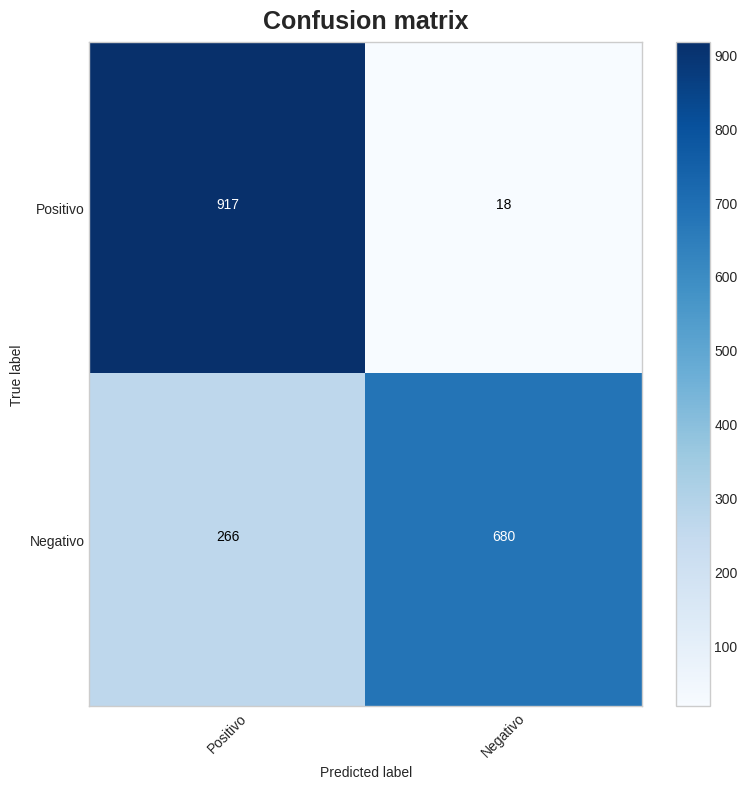

In [132]:
y_pred= (model.predict(x_validation) > 0.5).astype("int32")

clf_matrix = confusion_matrix(y_validation, y_pred)
print('Classification Report')
print(classification_report(y_validation, y_pred, target_names=['Positivo', 'Negativo']))
print('ROC Score: {}'.format(roc_auc_score(y_validation,y_pred)))
print('Accuracy Score: {}'.format(accuracy_score(y_validation, y_pred)))
print('Average Precision Score: {}'.format(average_precision_score(y_validation, y_pred)))
print('f1 Score: {}'.format(f1_score(y_validation, y_pred)))
plot_confusion_matrix(clf_matrix, classes=['Positivo', 'Negativo'])
roc_keras = roc_auc_score(y_validation, y_pred)

In [133]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 

In [134]:
clf_gnb_roc = clf_gnb.predict(x_validation)
gnb_roc_auc = roc_auc_score(y_validation, clf_gnb_roc)

model_roc = model.predict(x_validation)  # keras
model_roc_auc = roc_auc_score(y_validation, model_roc)


fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_validation, clf_gnb_roc)
fpr_net, tpr_net_lr, thresholds_net_lr = roc_curve(y_validation, model_roc)

 8/59 [===>..........................] - ETA: 0s

2023-05-26 20:55:33.108433: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 162021816 exceeds 10% of free system memory.


59/59 [==============================] - 1s 17ms/step


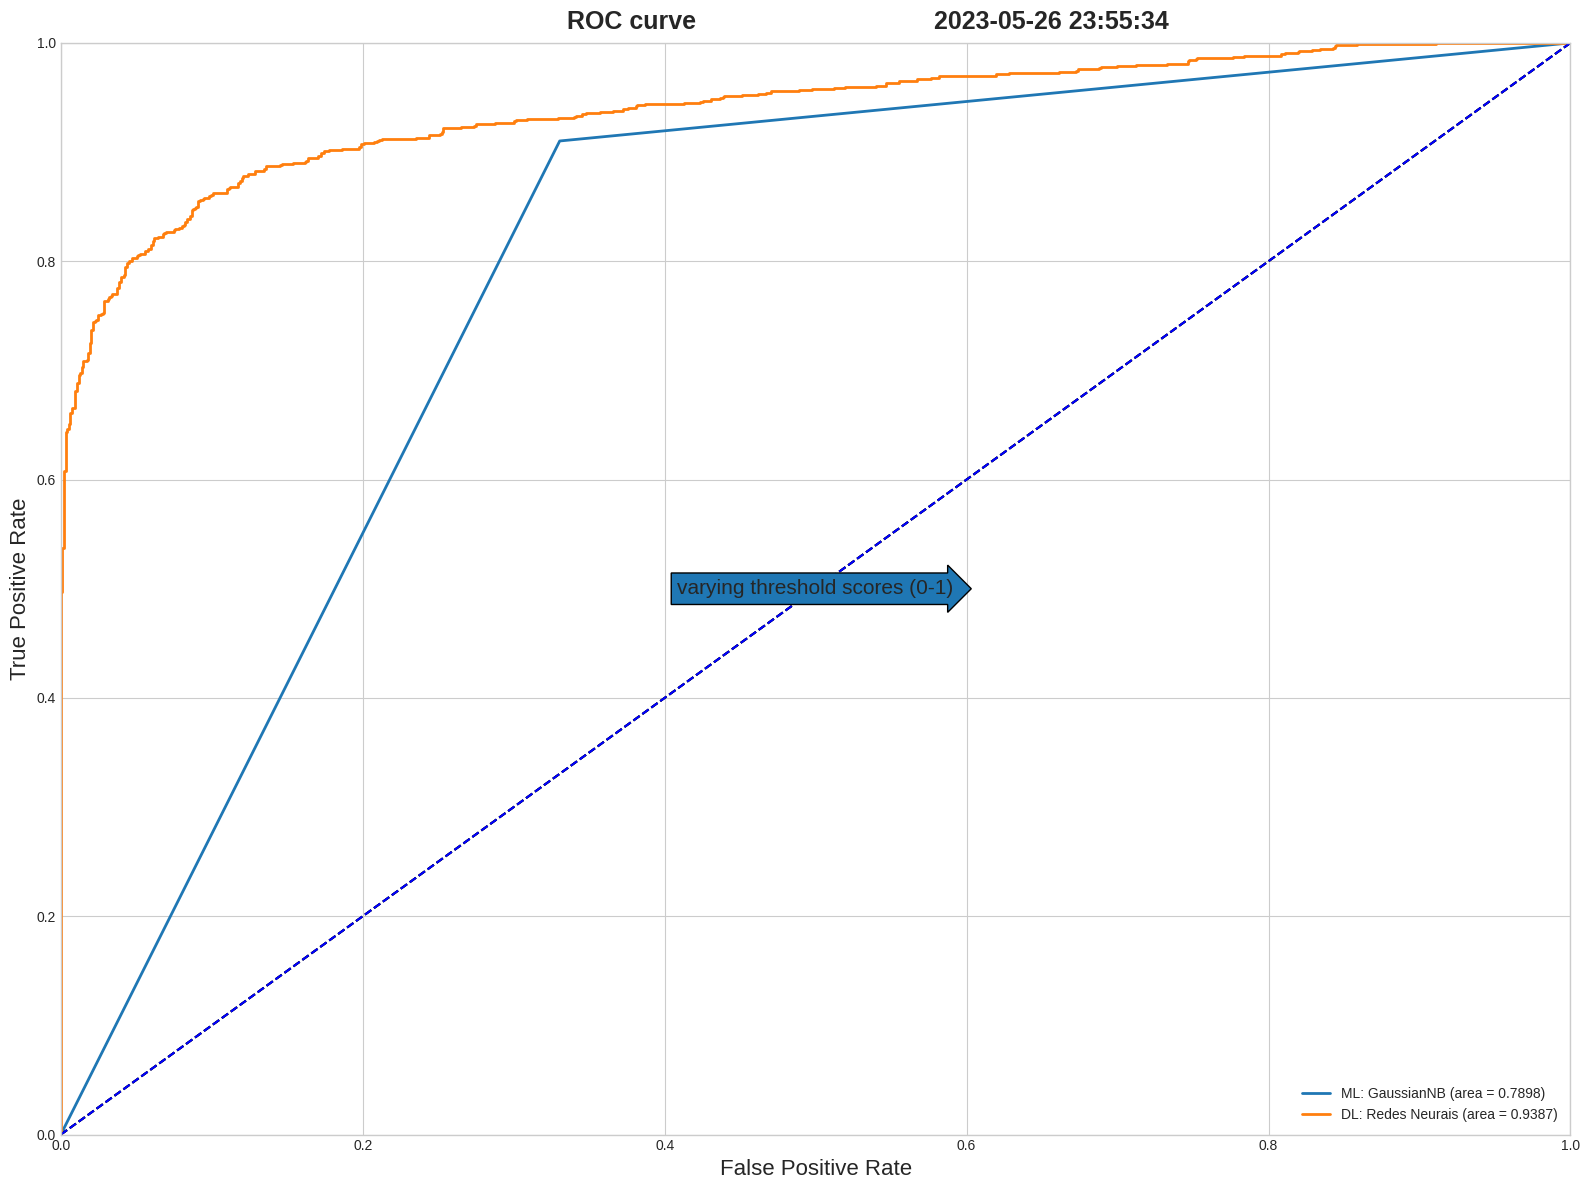

In [135]:
plt.figure(figsize=(16, 12))                                    # Not shown
plot_roc_curve(fpr_lr, tpr_lr, label='ML: GaussianNB (area = %0.4f)' % gnb_roc_auc)
plot_roc_curve(fpr_net, tpr_net_lr, label='DL: Redes Neurais (area = %0.4f)' % model_roc_auc)
#plot_roc_curve(fpr_bnb, tpr_bnb, label='BernoulliNB')
#plot_roc_curve(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot([0, 1], [0, 1],'b--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=15,ha="center", va="center",bbox=dict(boxstyle="rarrow")) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
now = strftime("%Y-%m-%d %H:%M:%S", gmtime())
plt.title(f'               ROC curve                                  {now}')
plt.legend(loc="lower right") 
plt.savefig('ROC_curves') 
plt.show()

In [136]:
#### File end HERE

# time of execution in minutes
time_exec_min = round( (time.time() - start_time)/60, 4)

print(f'time of execution (preprocessing): {time_exec_min} minutes')
print("the preprocessing is done.")
print("The next step is to do the feature engineering.")
print("All Done. :)")

time of execution (preprocessing): 6.6075 minutes
the preprocessing is done.
The next step is to do the feature engineering.
All Done. :)
